# Resampling Methods

### Student: Rodolfo Lerma

# Learning Objectives
- Evaluate performance of the selected model.
- Use k-fold cross validation to compare the performance of a pair of models.
-  Use repeated k-fold cross validation to compare the performance of a pair of models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Secom.csv')

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,43,44,45,46,47,48,50,51,53,54,55,56,57,58,75,76,77,78,79,80,81,82,83,89,90,92,93,103,104,118,136,144,145,146,147,148,150,151,152,153,154,155,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,190,191,192,193,194,195,210,211,212,213,214,215,216,217,218,224,225,227,228,238,239,253,270,271,279,280,281,282,283,285,286,287,288,289,290,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,326,327,328,329,330,331,348,349,350,351,352,353,354,355,356,362,363,365,366,376,377,391,408,409,417,418,419,420,421,423,424,425,426,427,428,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,462,463,464,465,466,467,482,483,484,485,486,487,488

In [3]:
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,!,0.5005,0.0118,0.0035,2.363,!,!,!,!,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,!,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [4]:
data.shape

(1567, 591)

You can see the distribution of the dataset: 1567 rows and 591 columns (features).

In [5]:
data['Target'].unique()

array([1, 0], dtype=int64)

The `Target` feature is a binary column.

### Question 1.1: Detect and replace missing values in the data with np.nan . Hint: missing data is noted as !

In [6]:
#data.replace('!', np.nan, inplace=True)
data.replace(to_replace=r' *\!', value=np.nan, inplace=True, regex=True)

### Question 1.2 Confirm that the change has worked

In [7]:
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [8]:
data.tail()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100,82.2467,0.1248,1.3424,-0.0045,...,203.172,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,1
1564,2978.81,2379.78,2206.3,1110.4967,0.8236,100,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,100,85.1011,0.1235,NaN,NaN,...,137.7844,0.4987,0.0181,0.004,3.6275,0.0117,0.0162,0.0045,137.784,1


Looking at the tables above we can confirm the change worked!

In [9]:
#Transform all the columns to numeric values
columns = data.columns.tolist()
for i in columns:
    data[i] = pd.to_numeric(data[i])

### Stats Summary

In [10]:
df = data.describe()
df

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.933631
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


Before we transform the data adding extra zeros, it is possible to see that we have some sensors giving repeated data (Ex. `Sensor_6`). These columns are going to be removed.

### Repeated Values (Columns with the same value)

In [11]:
not_repeated = []
repeated = []
updated_columns = data.columns.values.tolist()
y = data.shape
for i in updated_columns:
    x = data[i].std()
    if x == 0:
        repeated.append(i)
    else:
        not_repeated.append(i)

In [12]:
data[repeated].describe()

,Sensor 6,Sensor 14,Sensor 43,Sensor 50,Sensor 53,Sensor 70,Sensor 98,Sensor 142,Sensor 150,Sensor 179,...,Sensor 530,Sensor 531,Sensor 532,Sensor 533,Sensor 534,Sensor 535,Sensor 536,Sensor 537,Sensor 538,Sensor 539
count,1553.0,1564.0,1566.0,1566.0,1566.0,1561.0,1561.0,1553.0,1564.0,1543.0,...,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0
mean,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can clearly see that 117 sensors are just repeating the same values for all the data points.

In [13]:
data = data.drop(repeated, axis = 1)
data.shape

(1567, 474)

It is possible to see that **117 sensors** had repeated data (same value for all the measurements/rows)

### Missing Values (Columns with the missing more than 50% of the data)

In [14]:
missing_values = []
my_list = data.columns.values.tolist()
y = data.shape
for i in my_list:
    x = data[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

In [15]:
missing_columns_names = []
for key, value in columns_missing.items():
    if value > (data.shape[0])/2 : #15% of the data
        x = key
        missing_columns_names.append(x)

In [16]:
print(missing_columns_names)

['Sensor 73', 'Sensor 74', 'Sensor 86', 'Sensor 110', 'Sensor 111', 'Sensor 112', 'Sensor 158', 'Sensor 159', 'Sensor 221', 'Sensor 245', 'Sensor 246', 'Sensor 247', 'Sensor 293', 'Sensor 294', 'Sensor 346', 'Sensor 347', 'Sensor 359', 'Sensor 383', 'Sensor 384', 'Sensor 385', 'Sensor 493', 'Sensor 517', 'Sensor 518', 'Sensor 519', 'Sensor 579', 'Sensor 580', 'Sensor 581', 'Sensor 582']


In [17]:
data = data.drop(missing_columns_names, axis = 1)
data.shape

(1567, 446)

It is possible to see that **28 sensors** had more than 50% of missing data.

### Question 1.3: Fill the missing values with zeroes

In [18]:
data.fillna(0, inplace=True)

In [19]:
#Validate that the missing values were replaced
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,...,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [20]:
data.tail()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,...,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,0.0000,0.0000,0.0000,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,85.1011,0.1235,0.0000,0.0000,0.0000,...,22.9183,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,1


In [21]:
data.isnull().sum()

Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
Sensor 7      0
Sensor 8      0
Sensor 9      0
Sensor 10     0
Sensor 11     0
Sensor 12     0
Sensor 13     0
Sensor 15     0
Sensor 16     0
Sensor 17     0
Sensor 18     0
Sensor 19     0
Sensor 20     0
Sensor 21     0
Sensor 22     0
Sensor 23     0
Sensor 24     0
Sensor 25     0
Sensor 26     0
Sensor 27     0
Sensor 28     0
Sensor 29     0
Sensor 30     0
Sensor 31     0
Sensor 32     0
             ..
Sensor 558    0
Sensor 559    0
Sensor 560    0
Sensor 561    0
Sensor 562    0
Sensor 563    0
Sensor 564    0
Sensor 565    0
Sensor 566    0
Sensor 567    0
Sensor 568    0
Sensor 569    0
Sensor 570    0
Sensor 571    0
Sensor 572    0
Sensor 573    0
Sensor 574    0
Sensor 575    0
Sensor 576    0
Sensor 577    0
Sensor 578    0
Sensor 583    0
Sensor 584    0
Sensor 585    0
Sensor 586    0
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 446, dtype: int6

In [22]:
columns = data.columns.tolist()
for i in columns:
    data[i] = pd.to_numeric(data[i])

In [23]:
data.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,...,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,100.209538,0.121122,1.460995,-0.000840,0.000146,...,16.642363,0.499777,0.015308,0.003844,3.065869,0.021445,0.016464,0.005280,99.606461,0.933631
std,200.204648,184.815753,209.206773,458.937272,56.104457,11.363940,0.012831,0.090461,0.015107,0.009296,...,12.485267,0.013084,0.017179,0.003721,3.577730,0.012366,0.008815,0.002869,93.895701,0.249005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,-0.034900,...,4.582000,0.000000,0.000000,0.000000,0.000000,-0.016900,0.000000,0.000000,0.000000,0.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,97.762200,0.121100,1.410950,-0.010800,-0.005600,...,11.501550,0.497900,0.011600,0.003100,2.306200,0.013400,0.010600,0.003300,44.368600,1.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,101.492200,0.122400,1.461500,-0.001300,0.000400,...,13.817900,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000,1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,104.530000,0.123800,1.516850,0.008400,0.005900,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target',data=data)
plt.show()

<Figure size 640x480 with 1 Axes>

Looking at the `Target` variable we can easly see there is a class imbalance.

### Question 2.1: Split the data into Training and testing. Make your test size = 0.2 and your random_state = 42.

**Assumption:**
- There is another unseen data set that will be used for the final Test once the model and hyperparameters are selected thru the train/validation set. This data set is not available on this analysis.

In [25]:
columns.remove('Target')
features = data[columns]
target = data['Target']

In [26]:
#First split the Training/Validation and the Testing Set
#X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Question 2.2: Fit a logistic regression model on the training data. Predict the test data and plot the ROC curve

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = 'balanced', solver = 'saga', max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, solver='saga')

### Plot ROC Curve

Accuracy: 0.6910828025477707
AUC: 0.5520114942528735


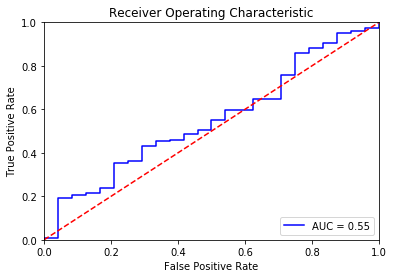

In [28]:
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
%matplotlib inline

y_pred = lr.predict(X_test)

# calculate the fpr and tpr for all thresholds of the classification
lr_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 2.2: Apply RFE with a logistic regression model on the training data testing out different number of features. Predict the test data and plot the ROC curve.

# Notes:

- **Since we are using Recursive Feature Elimination, it is critical to do some data scaling to help on the convergence as it is computationally expensive.**
    - Since the Features for this analysis are all over the place in terms of scale (magnitud) some a normalization will be used.
- For this first model no changes on the class imbalance situation will be done, just to the performance of the model as is.

In [29]:
from sklearn.preprocessing import StandardScaler

#StandardScaler Normalization
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score

model = LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5)

options = [2,5,10,50,100,200]
accuracy = []
precision = []
recall = []
for i in options:
    rfe = RFE(model, n_features_to_select = i)
    rfe.fit(X_train_scaled, y_train)
    y_pred = rfe.predict(X_test_scaled)
    lr_acc = accuracy_score(y_test, y_pred)   
    lr_precision = precision_score(y_test, y_pred)
    lr_recall = recall_score(y_test, y_pred)
    accuracy.append(lr_acc)
    precision.append(lr_precision)
    recall.append(lr_recall)
    print("\n# of RFE:",i,"Accuracy:", round(lr_acc,4), ",Precision:", round(lr_precision,4), ",Recall:", round(lr_recall,4))


# of RFE: 2 Accuracy: 0.9236 ,Precision: 0.9236 ,Recall: 1.0

# of RFE: 5 Accuracy: 0.9236 ,Precision: 0.9236 ,Recall: 1.0

# of RFE: 10 Accuracy: 0.9236 ,Precision: 0.9236 ,Recall: 1.0

# of RFE: 50 Accuracy: 0.9045 ,Precision: 0.9221 ,Recall: 0.9793

# of RFE: 100 Accuracy: 0.8949 ,Precision: 0.9327 ,Recall: 0.9552

# of RFE: 200 Accuracy: 0.8885 ,Precision: 0.9322 ,Recall: 0.9483


### Model Selection

In [31]:
#Selected model based on the results above:
rfe = RFE(model, n_features_to_select = 50)
rfe.fit(X_train_scaled, y_train)
y_pred = rfe.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, y_pred)

probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

Accuracy: 0.9044585987261147
AUC: 0.5035919540229885


### Plot ROC Curve

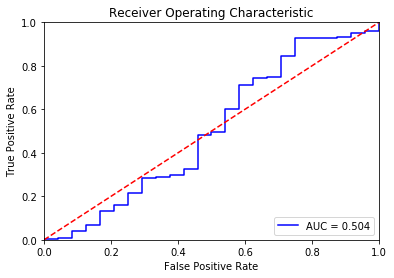

In [32]:
# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 3.1: Apply stratisfied tain test split to account for class imbalance

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    stratify=target, 
                                                    test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std_scaled = scaler.transform(X_train)
X_test_std_scaled = scaler.transform(X_test)

### Question 3.2: Apply RFE with a logistic regression model on the stratisfied training data testing out different number of features. Predict the test data and plot the ROC curve.

In [34]:
model = LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5)

options = [2,5,10,50,100,200]
accuracy = []
precision = []
recall = []
for i in options:
    rfe = RFE(model, n_features_to_select = i)
    rfe.fit(X_train_std_scaled, y_train)
    y_pred = rfe.predict(X_test_std_scaled)
    lr_acc = accuracy_score(y_test, y_pred)   
    lr_precision = precision_score(y_test, y_pred)
    lr_recall = recall_score(y_test, y_pred)
    accuracy.append(lr_acc)
    precision.append(lr_precision)
    recall.append(lr_recall)
    print("\n# of RFE:",i,"Accuracy:", round(lr_acc,4), ",Precision:", round(lr_precision,4), ",Recall:", round(lr_recall,4))


# of RFE: 2 Accuracy: 0.9331 ,Precision: 0.9331 ,Recall: 1.0

# of RFE: 5 Accuracy: 0.9331 ,Precision: 0.9331 ,Recall: 1.0

# of RFE: 10 Accuracy: 0.9331 ,Precision: 0.9331 ,Recall: 1.0

# of RFE: 50 Accuracy: 0.9236 ,Precision: 0.9353 ,Recall: 0.9863

# of RFE: 100 Accuracy: 0.9108 ,Precision: 0.9402 ,Recall: 0.9659

# of RFE: 200 Accuracy: 0.8949 ,Precision: 0.9362 ,Recall: 0.9522


### Model Selection after Class Imbalance Treatment

In [ ]:
regr = RFE(LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5), n_features_to_select=100, step=1)
regr.fit(X_train_std_scaled, y_train)

# calculate the fpr and tpr for all thresholds of the classification
y_pred = regr.predict(X_test_std_scaled)
lr_acc = accuracy_score(y_test, y_pred)

probs = regr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 4.1: Apply stratisfied K-Fold split where K=5 to the above data 

Note: This will be done using the model selected above

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, KFold

skf = StratifiedKFold(n_splits=5)
regr = RFE(LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5), n_features_to_select=100)
results = cross_val_score(model, X_train_std_scaled, y_train, cv=skf)
crossval_scores = cross_val_score(model, X_train_std_scaled, y_train, scoring='roc_auc', cv=skf)
predictions = cross_val_predict(model, X_train_std_scaled, y_train, cv=skf)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Looking at the 95% Confidence Intervals:

In [ ]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(results, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Implement the model and then create the ROC Curve

In [ ]:
regr = RFE(LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5), n_features_to_select=100, step=1)
regr.fit(X_train_std_scaled, y_train)

# calculate the fpr and tpr for all thresholds of the classification
y_pred = regr.predict(X_test_std_scaled)
lr_acc = accuracy_score(y_test, y_pred)

probs = regr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 4.2: Summarize your findings of all above models

The model is providing an `Accuracy` performance value 88.8% and we are 95 confident that the actual `Accuracy` will be between **87.7%** & **90.8%**.

At the same time it is possible to notice the poor `ROC AUC` value, indicating a prediction comparable to tossing a coin (I will explore this in the *Extra Analysis* section.

### Question 5. Create a new text cell in your Notebook: Complete a 50-100 word summary(or short description of your thinking in applying this week's learning to the solution)of your experience in this assignment. Include:
                                                                      
- What was your incoming experience with this model, if any?
- What steps you took, what obstacles you encountered.
- How you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)

# Extra Analysis

In this section of the analysis I will explore other methods for Feature Selection, Class Imbalance correction and different models/hyperparameters.

## Feature Selection (LASSO)

In [ ]:
# LASSO
from sklearn import linear_model
alpha = 0.001 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)

# features = data[columns]
# target = data['Target']

clf.fit(features, target)
lasso_coef = clf.coef_
wrapper_columns = features.columns.tolist()

print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

#Selection of the non zero coefficients from the LASSO regression
lasso_features = []
non_lasso_features = []
for i in range(len(wrapper_columns)):
    w = lasso_coef[i]
    if w != 0:
        u = wrapper_columns[i]
        lasso_features.append(u)
    else:
        t = wrapper_columns[i]
        non_lasso_features.append(t)
        
len_lasso = len(lasso_features)
print('# of Features using LASSO: ' + str(len_lasso))

### Split the Data into the Train/Validation & Test set

In [ ]:
#Split the data for variables with high mi value
lasso_variables = data[lasso_features]
X, X_test_final, y, y_test_final = train_test_split(lasso_variables, target, test_size=0.20, random_state=42)

In summary the variables that are going to be input to the model are:
- Training/Testing (this is going to be split into Training and Validation):
    - `X`
    - `y`
    
    
- Final Testing (unseen data to the model):
    - `X_test_final`
    - `y_test_final`

### Split the Data into the Train & Validation Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Class Imbalance

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

variables_sm, label_sm = sm.fit_resample(X, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(variables_sm, label_sm, test_size=0.20, random_state=42)

In summary the variables that are going to be input to the model are:
- Training:
    - `X_train_sm`
    - `y_train_sm`
    
    
- Testing:
    - `X_test`
    - `y_test`

## Different Models and Hyperparameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm, metrics
from sklearn.metrics import classification_report

### Hyperparameter Settings for the `Decision Tree` Model

In [ ]:
max_depth_options = [2,3,4,5,6,7,8,9,10]
min_sample_options = [2,3,4,5,6,7,8,9,10]
model_criterion = ['entropy', 'gini']
min_samples_leaf_options = [2,3,4,5,6,7,8,9,10]

dt_grid = {'criterion': model_criterion, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

dt_base = DecisionTreeClassifier()

decision_trees_hyper = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
decision_trees_hyper.fit(X_train_sm, y_train_sm)

x = decision_trees_hyper.best_params_
x

### Hyperparameter Settings for the `Random Forest` Model

In [ ]:
n_estimators_options = [10,20,30,40,50,60,70,80,90,100]

rf_grid = {'criterion': model_criterion,
           'n_estimators':n_estimators_options, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

rf_base = RandomForestClassifier()

random_forest_hyper = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
random_forest_hyper.fit(X_train_sm, y_train_sm)

y = random_forest_hyper.best_params_
y

### Hyperparameter Settings for the `Logistic Regression` Model

In [ ]:
max_iter_options = [1000,10000]
penalty_options = ['l1', 'l2', 'elasticnet', 'none']
solver_options = ['saga']
multi = ['multinomial']

lr_grid = {'penalty': penalty_options,
           'solver': solver_options,
           'multi_class': multi,
           'max_iter': max_iter_options}

lr_base = LogisticRegression()

logistic_reg_hyper = RandomizedSearchCV(estimator = lr_base, param_distributions = lr_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
logistic_reg_hyper.fit(X_train_sm, y_train_sm)

z = logistic_reg_hyper.best_params_
z

## Comparison

In [ ]:
def perfomance_values(T,Y,header):
    print("Classifier: ", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    print (" ")
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.values.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        allvalues = [AR, ER, P, R, F1]
    #return allvalues

    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['lightseagreen', 'tomato', 'darkmagenta', 'crimson', 'olive']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()

In [ ]:
#Classifiers
dt = DecisionTreeClassifier(criterion=x['criterion'], max_depth = x['max_depth'], min_samples_split = x['min_samples_split'], min_samples_leaf = x['min_samples_leaf'])
rf = RandomForestClassifier(n_estimators = y['n_estimators'], criterion = y['criterion'], max_depth = y['max_depth'], min_samples_split = y['min_samples_split'], min_samples_leaf = y['min_samples_leaf'])
lr = LogisticRegression(solver = z['solver'], penalty = z['penalty'], multi_class = z['multi_class'], max_iter = z['max_iter'])

#List for Classifiers and Names
header = ["Decision_Tree","Random_Forest", "Logistic_Regression"]
V = [dt, rf, lr]

In [ ]:
from sklearn import metrics
from sklearn.metrics import *
classifier_performance(V, header, X_train_sm, X_test, y_train_sm, y_test)

## Final Model Selection

From the comparison above we can see that the best model is `Random Forest` (with the selected *Hyperparameters*).

**Note:
The testing done on this final model would be using completely unseen data from the first split done above.**

In [ ]:
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = y['n_estimators'], criterion = y['criterion'], max_depth = y['max_depth'], min_samples_split = y['min_samples_split'], min_samples_leaf = y['min_samples_leaf'])
rf.fit(X_train_sm, y_train_sm)

y_pred = rf.predict(X_test_final)

# calculate the fpr and tpr for all thresholds of the classification
rf_acc = accuracy_score(y_test_final, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test_final)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_final, preds)
roc_auc = metrics.roc_auc_score(y_test_final, preds)
print("Accuracy: {}".format(rf_acc*100))
print("AUC: {}".format(roc_auc*100))

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
skf = StratifiedKFold(n_splits=10)
#regr = RFE(LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5), n_features_to_select=100)
results = cross_val_score(rf, X_train_sm, y_train_sm, cv=skf)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

In [ ]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(results, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Final notes:
- The model did a little bit better than the first model we got using `logistic_regression`
- As we can see even in this case using Cross Validation we over estimated the performance value coming from the `Training/Validation` data set compared to the unseen data at the final Testing.